# Student Exam Scores
(explanation/details here)

## Load the Data
Load the data from `exams.csv` and store it in a MyPyTable object named exams_table.

In [1]:
import os
import importlib

import mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable

exams_fname = os.path.join("input_data", "exams.csv")
exams_table = MyPyTable()
exams_table.load_from_file(exams_fname)

## Visualize Test Score Distributions
Displaying the distributions of the scores for each exam will help with the discretization process.

In [2]:
import plot_utils
importlib.reload(plot_utils)

math_data = exams_table.get_column("math score")
title = "Histogram for Scores of Math Exams"
plot_utils.plot_histogram(math_data, "Score", "Frequency", title)

reading_data = exams_table.get_column("reading score")
title = "Histogram for Scores of Reading Exams"
plot_utils.plot_histogram(reading_data, "Score", "Frequency", title)

writing_data = exams_table.get_column("math score")
title = "Histogram for Scores of Writing Exams"
plot_utils.plot_histogram(writing_data, "Score", "Frequency", title)

ModuleNotFoundError: No module named 'matplotlib'

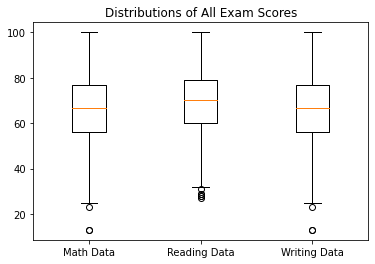

66.396
69.002
66.396


In [ ]:
all_exam_scores = [math_data, reading_data, writing_data]
chart_title = "Distributions of All Exam Scores"
plot_utils.box_plot(all_exam_scores, ["Math Data", "Reading Data", "Writing Data"], chart_title)

print(sum(math_data) / len(math_data))
print(sum(reading_data) / len(reading_data))
print(sum(writing_data) / len(writing_data))

In [3]:
import mypytable
import utils

math_col = exams_table.get_column("math score")
new_list = []
for i in math_col:
    print(int(i))
    discretized = utils.discretizer(int(i))
    new_list.append(discretized)

print(set(new_list))
#call get frequencies, show/visualize percentage of low medium and high 

67
40
59
77
78
63
62
93
63
47
99
80
77
74
81
69
58
54
23
39
83
58
71
44
46
51
53
71
74
33
87
78
40
65
79
68
57
67
58
98
54
77
87
58
100
60
64
65
68
60
65
52
74
36
57
56
67
88
42
68
76
58
69
77
83
49
71
47
79
60
56
57
49
79
71
71
47
72
78
54
46
31
51
78
32
53
63
97
56
72
57
74
81
94
81
58
95
45
63
60
54
75
79
66
47
70
82
56
92
30
79
41
63
43
77
76
49
59
59
76
55
78
51
41
74
62
77
45
100
83
77
66
65
62
55
73
73
48
52
60
68
65
86
55
80
51
63
60
100
46
67
54
63
68
54
43
64
92
82
84
84
65
83
70
66
71
66
57
86
80
62
71
57
69
83
50
55
55
83
89
51
48
84
69
75
91
76
63
73
52
58
33
68
77
64
39
50
53
54
74
50
55
77
49
66
77
74
85
77
64
61
97
66
62
64
55
53
71
66
68
89
65
43
79
99
82
35
61
76
94
75
81
35
76
58
100
53
82
76
83
72
76
66
63
36
68
40
68
56
74
53
88
67
60
51
53
80
69
64
80
58
39
64
61
90
73
73
67
57
65
71
59
74
93
85
76
58
72
40
75
85
100
53
40
49
77
82
55
62
69
78
71
59
60
43
77
50
56
69
47
43
48
55
73
71
54
66
63
66
79
73
36
50
87
71
85
58
86
64
83
58
59
40
82
87
62
76
63
58
61
78
78